<a href="https://colab.research.google.com/github/NhaBaodang/CK_AI/blob/main/AI_CK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
data="/content/drive/MyDrive/Face1/"

In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 1376 images belonging to 13 classes.


{'Anh_Viet': 0,
 'Bao_Nha': 1,
 'Chi_Nhan': 2,
 'Doan_Quang_Nhat': 3,
 'Giang_Ha': 4,
 'Hai_Hieu': 5,
 'Kim_Thoa': 6,
 'Le_Quang_Nhat': 7,
 'Son_Lam': 8,
 'Tan_Vu': 9,
 'Thao_Hung': 10,
 'Thien_Phat': 11,
 'Tuan_Nam': 12}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
#Chuyển đổi mảng dữ liệu hình ảnh đa chiều thành mảng một chiều
model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(13,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
43/43 [==============================] - 685s 16s/step - loss: 2.3314 - accuracy: 0.7064
Epoch 2/50
43/43 [==============================] - 110s 3s/step - loss: 0.1277 - accuracy: 0.9680
Epoch 3/50
43/43 [==============================] - 110s 3s/step - loss: 0.0726 - accuracy: 0.9760
Epoch 4/50
43/43 [==============================] - 110s 3s/step - loss: 0.0534 - accuracy: 0.9818
Epoch 5/50
43/43 [==============================] - 111s 3s/step - loss: 0.0502 - accuracy: 0.9847
Epoch 6/50
43/43 [==============================] - 111s 3s/step - loss: 0.0130 - accuracy: 0.9964
Epoch 7/50
43/43 [==============================] - 111s 3s/step - loss: 0.0128 - accuracy: 0.9971
Epoch 8/50
43/43 [==============================] - 111s 3s/step - loss: 0.0062 - accuracy: 0.9978
Epoch 9/50
43/43 [==============================] - 112s 3s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 10/50
43/43 [==============================] - 111s 3s/step - loss: 6.5254e-04 - accuracy: 1.0000
Epoc

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.0011555803939700127
Độ Chính Xác Trên Tập Kiểm Tra :  0.9992732405662537


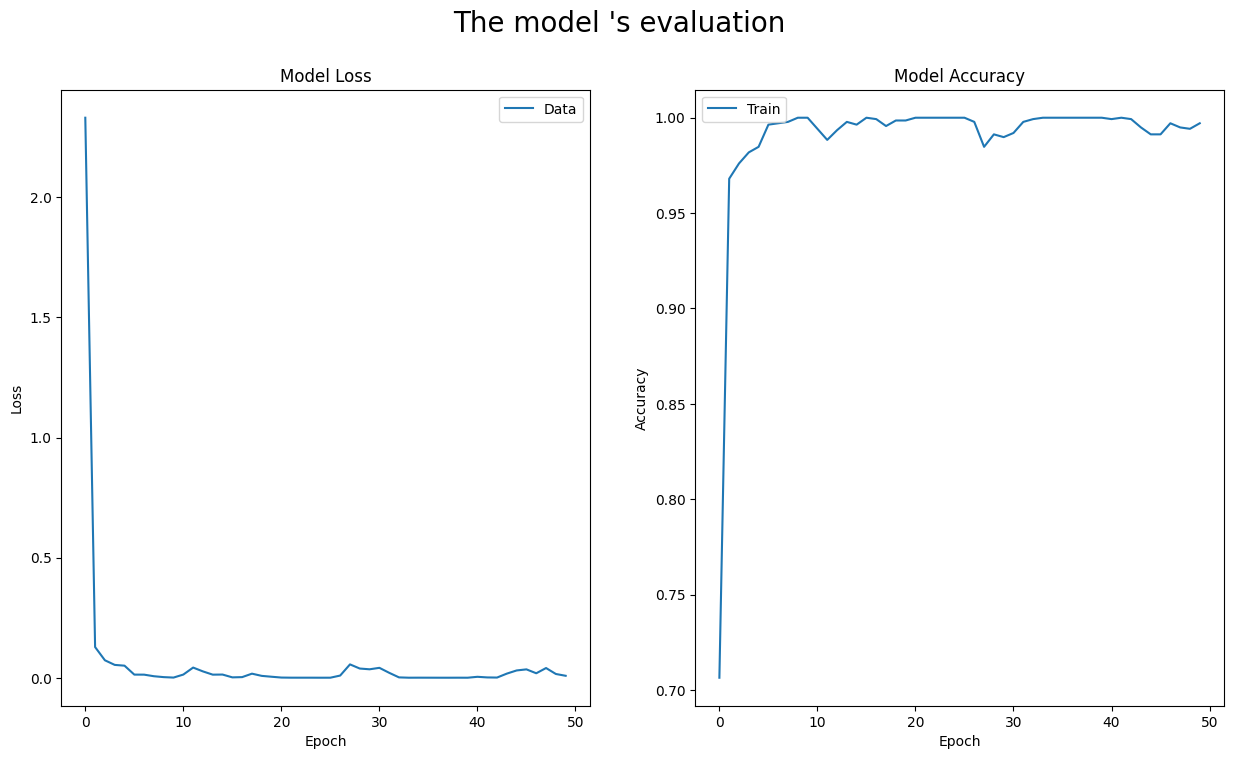

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()